This is a simple pytorch tutorial to teach you how to use pytorch. [Pytorch](https://pytorch.org/) is widely used for deep learning and it supports automatically gradient computing. 

Let see how pytorch works.

## 0. Brief Introduction of Pytorch
## 0.1 Pytorch: A Brief History

The initial release of PyTorch was in October of 2016, and before PyTorch was created, there was and still is, another framework called Torch. [Torch](https://en.wikipedia.org/wiki/Torch_(machine_learning)) is a machine learning framework that's been around for quite a while and is based on the Lua programming language.

The connection between PyTorch and this Lua version, called Torch, exists because many of the developers who maintain the Lua version are the individuals who created PyTorch.

[Soumith Chintala](https://twitter.com/soumithchintala) is credited with bootstrapping the PyTorch project, and his reason for creating PyTorch is pretty simple, the Lua version of Torch was aging, and so a newer version written in Python was needed. As a result, [PyTorch](https://github.com/pytorch/pytorch/graphs/contributors) came to be.

## 0.2 A List of Pytorch Packages

This table gives us a list of PyTorch packages and their corresponding descriptions. 

<p align="center">
<img src="media/pytorch-package.png" alt="drawing" width="600"/>
</p>

## 0.3 Why Pytorch

The top reason for learning PyTorch is that it is a **thin** framework that stays out of the way. When we build neural networks with PyTorch, we are super close to programming neural networks **from scratch**. The experience of programming in PyTorch is as close as it gets to the real thing.


## 1. How to Autograd

Since pytorch can compute derivatives automatically (autograd), we show 2 examples of the autograd of pytorch.

### 1.1 Autograd from Scratch

In [1]:
# Import modules
import torch # pytorch core module
import torchvision # pytorch computer vision module
import torch.nn as nn # pytorch standard net module
import numpy as np
import torchvision.transforms as transforms # scaling function

Let us start with the first example, we compute the gradients of `y = w * x + b`

In [2]:
# Create tensors.
x = torch.tensor(1., requires_grad=True) # set requires_grad if compute 
w = torch.tensor(2., requires_grad=True) #                  derivatives
b = torch.tensor(3., requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 

tensor(2.)
tensor(1.)
tensor(1.)


>**Remarks:** 
>After you build the computation graph, you can compute gradients by calling `.backward()` for any equation. The attribute `grad` shows the partial derivatives. For example, `x.grad` shows partial derivative of `y` with respect to `x`.

### 1.2 Autograd with nn.Linear

Actually `y = w * x + b` is a simple linear model. We use `nn.Linear` in this example to show how to create a linear model using pytorch standard module:

In [3]:
# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[ 0.5051, -0.5216, -0.4381],
        [ 0.2371,  0.0845,  0.3585]], requires_grad=True)
b:  Parameter containing:
tensor([0.2727, 0.2857], requires_grad=True)


>**Remarks**: `w` and `b` are the weight and bias of the linear model, respectively. They are intialized with random variables. 


Now we show how to use the linear model `w*x +b` to approximate `y`:

In [4]:
# Build loss function and optimizer.
criterion = nn.MSELoss() # Mean Square Error
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01) # Stocastic 
                                                    #Gradient Descend 

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

loss:  2.1508634090423584


>**Remarks:** 

>`MSELOSS` is the loss class called Mean Square Error. 

>`SDG` is the optimizer class called Stochastic Gradient Descend. We use the loss function to compute the error between the predicted value of the linear model and ground truth.

Now we optimize the linear model to make its predicted value closed to `y` as much as possible. Let us do one-step optimization:

In [5]:
# Backward pass.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

# 1-step gradient descent.
optimizer.step()

# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

dL/dw:  tensor([[ 1.4162, -0.2026, -1.7369],
        [-0.2729,  0.3179,  0.3204]])
dL/db:  tensor([ 0.8207, -0.0304])
loss after 1 step optimization:  2.091369390487671


> **Remarks:**  

>`loss.backward()` is a function call that compute and refresh the gradients in the computational graph. 

>`optimizer.step()` is a one-step function for parameter optimzation. Take Gradient Descent as an example, `weight_new = weight_old - learning_rate * gradients`. So the `step()` function will update all the parameters in the computational graph with `weight_new`.

Let us do 10-step optimization:

In [6]:
for i in range(10):
    optimizer.step()

# Print out the loss after 10-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 10 step optimization: ', loss.item())

loss after 10 step optimization:  1.5699163675308228


>**Remarks:** Now you can find that the as the steps of optimization increases, the loss decreases. And that means the prediction is more accurate with optimization

## 2.How to create torch tensor 

### 2.1 Create tensor directly 



In [7]:
y = torch.tensor([[1, 2], [3, 4]], dtype=torch.int64)
print(f'y: {y}')

y: tensor([[1, 2],
        [3, 4]])


### 2.2 Create tensor with numpy

Now we show how to create a tensor from numpy array:

In [8]:
# Create a numpy array.
x = np.array([[1, 2], [3, 4]])

# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)

# Convert the torch tensor to a numpy array.
z = y.numpy()

print(f'x: {x}')
print(f'y: {y}')
print(f'z: {z}')

x: [[1 2]
 [3 4]]
y: tensor([[1, 2],
        [3, 4]])
z: [[1 2]
 [3 4]]


## 3. Deep Learning for MNIST dataset

MNIST dataset is a large database for handwritten digits. Here is the [WIKI link](https://en.wikipedia.org/wiki/MNIST_database). In AI area, MNIST dataset is like "HelloWorld" Dataset for the classfication task.

The MNIST is a bunch of gray-scale handwritten digits with outputs that are ranging from 0, 1, 2, 3 and so on through 9. Each of these images is 28 by 28 pixels in size and the goal is to identify what the number is in these images.

Having a detailed look at the documentation, each of the images is labeled with the digit that’s in that image. To access this dataset we will use the Torchvision package which came along when we were installing PyTorch. This library provides us with datasets, and models for tackling computer vision problems.


>*Do you know that 25 years ago MNIST was the hardest problem in Computer Vision at the time? 🙂 check out this amazing video of Yann LeCun* 
“”
[https://youtu.be/FwFduRA_L6Q](https://youtu.be/FwFduRA_L6Q)

### 3.1 Download MNIST Dataset (Optional)

You can **skip** the following instructions since MNIST dataset have been included in our github repository. Here just show you how to download from Internet if you do not have local MNIST dataset.

In [ ]:
## install wget  (uncomment the line based on your local computer system)

!brew install wget # for mac
# !sudo apt-get install wget # for ubuntu

In [ ]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz # wget download dataset

## 3.2 Load Mnist Dataset

In [9]:
!tar -zxvf MNIST.tar.gz # unzip the downloaded file

x MNIST/
x MNIST/raw/
x MNIST/raw/train-labels-idx1-ubyte
x MNIST/raw/t10k-labels-idx1-ubyte.gz
x MNIST/raw/t10k-labels-idx1-ubyte
x MNIST/raw/t10k-images-idx3-ubyte.gz
x MNIST/raw/train-images-idx3-ubyte
x MNIST/raw/train-labels-idx1-ubyte.gz
x MNIST/raw/t10k-images-idx3-ubyte
x MNIST/raw/train-images-idx3-ubyte.gz
x MNIST/processed/
x MNIST/processed/training.pt
x MNIST/processed/test.pt


In [10]:
# load python modules
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline 

In [11]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

> **Remarks**: `torch.device()` is a class specifying the device for your computational graph. 

> `torch.device('cuda')` will use gpu on your local machine

>`torch.device('cpu')` will use cpu on your local machine

>`torch.cuda.is_available()` will check if your local computer has gpu devices.

In [12]:
## load Mnist dataset

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./', 
                                           train=True, 
                                           transform=transforms.ToTensor())

test_dataset = torchvision.datasets.MNIST(root='./', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


> Remarks: `torchvision.datasets()` is a pytorch data set class for MNIST. See how to create a customized pytorch data structure class in [here](https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/pytorch_basics/main.py#L137) 

> `torch.utils.data.DataLoader` is a data loader that loads data from dataset in a specifed order (shuffle or non shuffle).

Let us check the input and the shape of input of MNIST data

In [13]:
# The input of the 1st data
for images, labels in train_loader:
    print(images[0]) # print the input data for the 1st data point
    break

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3765, 0.9961,
          0.5843, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.7059, 0.8941,
          0.1804, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [14]:
# The input shape of the 1st data
for images, labels in train_loader:
    print(images[0].shape) # print the input data for the 1st data point
    break

torch.Size([1, 28, 28])


>**Remarks:** The dimension of input data is 1x28x28, which is a 3 dimensional array. 

Let us check the output data.

In [15]:
# Output for the first 5 data
for images, labels in train_loader:
    for j in range(5):
        print(labels[j]) # print the Output data for the 1st data point
    break

tensor(8)
tensor(5)
tensor(6)
tensor(4)
tensor(1)


>**Remarks:** The output is 1 dimensional integer data in the range of 0~9.

Let us visualize the input data to get some insights:

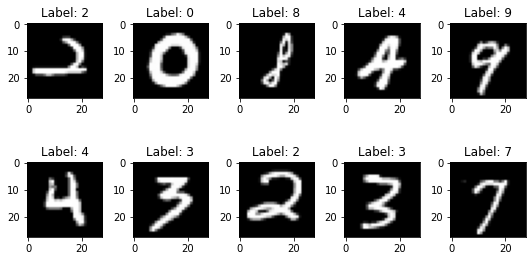

In [16]:
## plot the first 10 data in the dataset
for images, labels in train_loader:
    num_row = 2
    num_col = 5
    fig, axes = plt.subplots(num_row, num_col, 
                             figsize=(1.5*num_col,2*num_row))
    for i in range(10):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(images[i][0], cmap='gray')
        ax.set_title('Label: {}'.format(labels[i]))
    plt.tight_layout()
    break

>**Remarks:** The input data is easy for a human to recognize, but it is extremely hard for a machine to recognize. So our job is to endow the machine with the ability to understand the relationship between the numbers of input and output data.


## 3.3 Feedforward Neural Network

Now let us see how to create a feedforward neural network:

In [17]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)# Linear Layer
        self.relu = nn.ReLU() # RelU Function
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x): # x is input
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


> **Remarks:** We create a customized class which inherits the parent class `nn.Module`.

> To create a custimized neural network, you need to specify the `__init__` function and `forward` function. 

>`__init__` function will be called once when the class is initialized. Here we created two fully-connected layers using `nn.Linear()`. And we created a [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) function.

>`forward` function will build a computational graph of your feedforward neural network. 

In [18]:
## create instances
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

> **Remarks:** Here we creates instances. 
    
> `.to(device)` is a attribute function that assign the net to specify device ('CPU' or 'GPU')

> `nn.CrossEntropyLoss()` is a cross entropy loss class. Here is the [video](https://www.youtube.com/watch?v=IVVVjBSk9N0) to explain loss functions by Siraj Raval

>`torch.optim.Adam()` is the class for Adam Optimizer. Adam is a popular optimizer for deep learning. Here is the [video](https://www.youtube.com/watch?v=mdKjMPmcWjY) to explain how the optimizer works and the comparison among optimizers.

Now we define a function to evaluate our neural network performance on test dataset:

In [19]:
def evaluate():
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


In [20]:
evaluate()

Accuracy of the network on the 10000 test images: 10.48 %


Looks terrible for the accuracy of our neural network! Because we initialize the parameters with random numbers and they have not been trained. To improve the accuracy, we need to learn the parameters using optimization:

In [21]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, 
                           loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.2918
Epoch [1/5], Step [200/600], Loss: 0.2085
Epoch [1/5], Step [300/600], Loss: 0.1450
Epoch [1/5], Step [400/600], Loss: 0.0760
Epoch [1/5], Step [500/600], Loss: 0.1472
Epoch [1/5], Step [600/600], Loss: 0.1373
Epoch [2/5], Step [100/600], Loss: 0.2252
Epoch [2/5], Step [200/600], Loss: 0.2031
Epoch [2/5], Step [300/600], Loss: 0.0790
Epoch [2/5], Step [400/600], Loss: 0.0679
Epoch [2/5], Step [500/600], Loss: 0.0731
Epoch [2/5], Step [600/600], Loss: 0.1213
Epoch [3/5], Step [100/600], Loss: 0.0626
Epoch [3/5], Step [200/600], Loss: 0.1227
Epoch [3/5], Step [300/600], Loss: 0.0333
Epoch [3/5], Step [400/600], Loss: 0.1112
Epoch [3/5], Step [500/600], Loss: 0.0399
Epoch [3/5], Step [600/600], Loss: 0.0538
Epoch [4/5], Step [100/600], Loss: 0.0392
Epoch [4/5], Step [200/600], Loss: 0.0140
Epoch [4/5], Step [300/600], Loss: 0.0284
Epoch [4/5], Step [400/600], Loss: 0.0707
Epoch [4/5], Step [500/600], Loss: 0.0248
Epoch [4/5], Step [600/600], Loss:

In [23]:
evaluate()

Accuracy of the network on the 10000 test images: 98.01 %


Now you see that the accuracy up to 97% after optimzation.

To save or load the model you can call:

In [24]:
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt') # save model parameters
model.load_state_dict(torch.load('model.ckpt')) # load model parameters

<All keys matched successfully>

## 3.5 Convolution Neural Network

Most generally, we can think of a CNN as an artificial neural network that has some type of specialization for being able to pick out or detect patterns. This pattern detection is what makes CNNs so useful for image analysis.

If a CNN is just an artificial neural network, though, then what differentiates it from a standard multilayer perceptron or MLP?

CNNs have hidden layers called convolutional layers, and these layers are what make a CNN, well... a CNN!

>CNNs have layers called convolutional layers.

Here is the [video](https://youtu.be/YRhxdVk_sIs) explaining what CNN is.

#### Convolutional Layer
With a convolutional layer, the transformation that occurs is called a convolution operation. This is the term that's used by the deep learning community anyway. Mathematically, the convolution operations performed by convolutional layers are actually called [cross-correlations](https://en.wikipedia.org/wiki/Cross-correlation).

Convolutional Layer serves as a filter that detects the pattern in the feature input. Here is the [video](https://youtu.be/cNBBNAxC8l4) to explain how the CNN works as the filter. And you can also play the interactive [demo](https://deeplizard.com/resource/pavq7noze2).


In [25]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

> **Remarks:** `nn.Conv2d()` is the pytorch class for the convolutional layer. Here you can find [documentation](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)

> `nn.BatchNorm2d()` is a batch normalization function. Here are [Documentation](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html) and [video](https://youtu.be/dXB-KQYkzNU) explaination.

> `MaxPool2d()` is a MaxPool function. Here are [Documentation](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) and [video](https://youtu.be/ZjM_XQa5s6s) explaination.

>`nn.Sequential()` is a sequential container that build computational graph with layers in sequential order. Here is the api [documentation](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)

Now we can create instances and train the cnn with optimization. The process is similar to that of a feedforward neural network.

In [26]:
## Create Instances

model = ConvNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [27]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.1478
Epoch [1/5], Step [200/600], Loss: 0.0533
Epoch [1/5], Step [300/600], Loss: 0.0698
Epoch [1/5], Step [400/600], Loss: 0.0369
Epoch [1/5], Step [500/600], Loss: 0.0192
Epoch [1/5], Step [600/600], Loss: 0.0689
Epoch [2/5], Step [100/600], Loss: 0.0132
Epoch [2/5], Step [200/600], Loss: 0.0157
Epoch [2/5], Step [300/600], Loss: 0.0359
Epoch [2/5], Step [400/600], Loss: 0.0082
Epoch [2/5], Step [500/600], Loss: 0.1542
Epoch [2/5], Step [600/600], Loss: 0.0217
Epoch [3/5], Step [100/600], Loss: 0.0319
Epoch [3/5], Step [200/600], Loss: 0.0086
Epoch [3/5], Step [300/600], Loss: 0.0269
Epoch [3/5], Step [400/600], Loss: 0.0140
Epoch [3/5], Step [500/600], Loss: 0.0705
Epoch [3/5], Step [600/600], Loss: 0.0114
Epoch [4/5], Step [100/600], Loss: 0.0204
Epoch [4/5], Step [200/600], Loss: 0.1101
Epoch [4/5], Step [300/600], Loss: 0.1190
Epoch [4/5], Step [400/600], Loss: 0.0834
Epoch [4/5], Step [500/600], Loss: 0.0265
Epoch [4/5], Step [600/600], Loss:

In [28]:
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
def evaluate():
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))
evaluate()

Test Accuracy of the model on the 10000 test images: 99.02 %


The accuracy of CNN is slightly better than the feedforward neural network. In fact CNN will outperform feedforward net when the size image is large.

Congratulation! You finish the pytorch tutorial.

## Reference

[1] [DEEPLIZARD Pytorch Tutorial](https://deeplizard.com/learn/video/iTKbyFh-7GM)

[2] [yunjey pytorch-tutorial](https://github.com/yunjey/pytorch-tutorial)

[3] [Optimizers video](https://www.youtube.com/watch?v=mdKjMPmcWjY)

[4] [Loss Function video](https://www.youtube.com/watch?v=IVVVjBSk9N0)